# Exploring the Relationship Between Police Stops and Crime in San Diego: A Microgeographic Analysis of Demographic Factors and Policing Strategies

In recent years, the effectiveness and implications of police stops have been at the center of public debate and academic inquiry. This study aims to contribute to the ongoing discourse by examining the relationship between police stops and crime in San Diego at a microgeographic level. By focusing on regional variations, demographic factors, and community impact, we seek to provide valuable insights into the efficiency and consequences of police stops within the city's diverse police beats. Through a comprehensive analysis of crime patterns and outcomes, our research aims to inform evidence-based recommendations for refining and improving policing strategies in San Diego and other similar urban areas, ultimately fostering more equitable and effective law enforcement practices.

In examining the relationship between police stops and crime, it is important to consider the existing literature on this subject. Miller et al. (2000) found that while stops and searches play some role in fighting crime and lead to about one-tenth of arrests nationally, they have only a small impact on the detection and prevention of recorded or reported crime. Additionally, searches tend to have a negative impact on public confidence in the police, often due to perceived impoliteness and inadequate explanations for stopping individuals. The authors recommend focusing on efficient and targeted use of searches based on intelligence and high levels of suspicion, while emphasizing more serious crimes and prolific offenders.

MacDonald et al. (2016) investigated the effects of the New York Police Department's (NYPD) Operation Impact, which deployed extra police officers to high crime areas. The authors found that impact zones were associated with significant reductions in reported crimes and increases in reported arrests. However, they also noted that the majority of investigative stops did not play an important role in crime reduction, suggesting that more focused investigative stops could be more effective.

Weisburd et al. (2015) explored the impact of stop, question, and frisks (SQFs) on crime in New York City at a microgeographic level. They found that SQFs produce a significant yet modest deterrent effect on crime, but questioned whether other policing strategies might yield similar or stronger crime-control outcomes. They also noted that the level of SQFs needed to achieve meaningful crime reductions can be costly and potentially harmful to police legitimacy.

Petersen et al. (2023) conducted a systematic review and meta-analysis on the effects of police-initiated pedestrian stops on crime and individual-level outcomes. Their findings indicated that pedestrian stop interventions were associated with a statistically significant reduction in crime for treatment areas relative to control areas. However, they also found that such interventions led to a broad range of negative individual-level effects, such as increased odds of mental and physical health issues, more negative attitudes toward the police, and higher levels of self-reported crime and delinquency. The authors concluded that, although pedestrian stop interventions have favorable effects on place-based crime and displacement outcomes, the negative individual-level effects make it difficult to recommend their use over alternative policing interventions.

By examining the relationship between stops and crime within San Diego's police beats, our study will add valuable insights on regional variations in the effectiveness of police stops. This localized focus allows us to compare different areas with varying levels of crime and stops, providing insights that can be used to improve policing strategies. Furthermore, our research will assess the efficiency of police stops in San Diego and explore how well they align with crime levels across different police beats.

Focusing on demographic factors, our study will investigate the role of variables such as race and gender in the relationship between police stops and crime in San Diego. By examining how these factors may influence the patterns and outcomes of stops, we aim to contribute to a deeper understanding of the impact of police practices on different communities and support the development of more equitable policing strategies.

In summary, our study on the relationship between police stops and crime in San Diego will complement and extend the existing literature, offering valuable insights that contribute to a deeper understanding of this relationship and providing evidence-based recommendations for refining and improving policing strategies in San Diego and other similar cities.

### Data Prep

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read the crime data
"""
Crime Data has the following columns:
    ['activityNumber', 'activityType', 'activityDate', 'Year',
       'violationSection', 'violationType', 'chargeDescription', 'codeUcr',
       'BlockNumber', 'streetDirection', 'streetName', 'streetType', 'city',
       'state', 'zipCode', 'beat']
"""
crime_data = pd.read_excel('PRA 21-4922_2019-2021_Crimes__UCR Revised.xlsx')

# read the stop data
"""
Stop Data has the following columns:
    ['Unnamed: 0', 'stop_id', 'pid', 'id', 'ori', 'agency', 'exp_years',
       'date', 'time', 'dur', 'is_serv', 'assign_key', 'assign_words',
       'inters', 'block', 'ldmk', 'street', 'hw_exit', 'is_school',
       'school_name', 'city', 'beat', 'beat_name', 'is_student', 'lim_eng',
       'age', 'gender_words', 'is_gendnc', 'gender_code', 'gendnc_code',
       'lgbt', 'race', 'disability', 'reason_words', 'reasonid', 'reason_text',
       'reason_detail', 'reason_exp', 'search_basis', 'search_basis_exp',
       'seiz_basis', 'prop_type', 'cont', 'actions', 'act_consent']
"""
stops_2019 = pd.read_csv('master-ripa-2019.csv')
stops_2020 = pd.read_csv('master-ripa-2020.csv')
stops_2021 = pd.read_csv('master-ripa-2021.csv')

# read the beat demographics data
"""
Beat Demographics Data has the following columns:
    ['beat', 'total', 'white', 'black', 'aian', 'asian', 'nhopi', 'hisp']
"""
beat_demographics = pd.read_csv('beat_demographics_2019_acs.csv')

/var/folders/71/wmk9vs213tlg98b354gxvj4m0000gn/T/ipykernel_38642/34588365.py:23: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  stops_2019 = pd.read_csv('master-ripa-2019.csv')
/var/folders/71/wmk9vs213tlg98b354gxvj4m0000gn/T/ipykernel_38642/34588365.py:24: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  stops_2020 = pd.read_csv('master-ripa-2020.csv')
/var/folders/71/wmk9vs213tlg98b354gxvj4m0000gn/T/ipykernel_38642/34588365.py:25: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  stops_2021 = pd.read_csv('master-ripa-2021.csv')


In [3]:
# Combine stops data from 2019, 2020, and 2021
stops_data = pd.concat([stops_2019, stops_2020, stops_2021])

Fix Race Labels in the stop data

In [4]:
# print number of unique race values
print(len(stops_data["race"].unique()))

146


In [5]:
# convert race to string typ
stops_data["race"] = stops_data["race"].astype(str)

In [6]:
len(stops_data["race"].unique())

146

In [7]:
# print first 5 instances of race
stops_data["race"].head()

0          Hispanic/Latino/a
1                      White
2    Hispanic/Latino/a|White
3          Hispanic/Latino/a
4     Black/African American
Name: race, dtype: object

In [8]:
# check if the first 5 have "|" in them
stops_data["race"][0:5].str.contains('\\|', regex=True).sum()

1

In [9]:
multiracial_count = stops_data['race'].str.contains('\\|', regex=True).sum()
total_count = len(stops_data)
print(f"Multiracial count: {multiracial_count} out of {total_count} ({100 * multiracial_count / total_count:.2f}%)")

Multiracial count: 3767 out of 407684 (0.92%)


In [10]:
# count the unique values in the race column that do not contain '\\|'
stops_data["race"][~stops_data["race"].str.contains('\\|', regex=True)].value_counts()

White                            168446
Hispanic/Latino/a                119515
Black/African American            81387
Asian                             19647
Middle Eastern or South Asian     11001
Pacific Islander                   3112
Native American                     809
Name: race, dtype: int64

In [11]:
def simplify_race(race):
    if 'White' in race:
        return 'white'
    elif 'Black/African American' in race:
        return 'black'
    elif 'Asian' in race:
        return 'asian'
    elif 'Hispanic/Latino/a' in race:
        return 'hisp'
    elif 'Native American' in race:
        # https://www.census.gov/programs-surveys/acs/data/race-aian.html
        return 'aian'
    elif 'Pacific Islander' in race:
        return 'nhopi'
    elif 'Middle Eastern or South Asian' in race:
        return 'other'
    else:
        return 'other'

In [12]:
# apply the simplify_race function to the race column
stops_data["race"] = stops_data["race"].apply(simplify_race)

Add other race to demographic data

In [13]:
beat_demographics['other'] = beat_demographics['total'] - (
    beat_demographics['white'] + 
    beat_demographics['black'] + 
    beat_demographics['aian'] + 
    beat_demographics['asian'] + 
    beat_demographics['nhopi'] + 
    beat_demographics['hisp']
)


In [14]:
# Group crime and stops data by beat
crime_by_beat = crime_data.groupby('beat').size().reset_index(name='num_crimes')
stops_by_beat = stops_data.groupby(['beat', 'race']).size().reset_index(name='num_stops')

# Merge crime and stops data by beat
crime_stops_by_beat = pd.merge(crime_by_beat, stops_by_beat, on='beat')

# Merge crime_stops_by_beat with beat_demographics
crime_stops_demographics_by_beat = pd.merge(crime_stops_by_beat, beat_demographics, on='beat')

# Calculate the ratio of stops to crimes in each beat
crime_stops_demographics_by_beat['stops_to_crimes_ratio'] = crime_stops_demographics_by_beat['num_stops'] / crime_stops_demographics_by_beat['num_crimes']

# Calculate the proportion of stops for each racial group in each beat
racial_groups = ['white', 'black', 'aian', 'asian', 'nhopi', 'hisp', 'other']
for group in racial_groups:
    crime_stops_demographics_by_beat[f'{group}_stops_proportion'] = crime_stops_demographics_by_beat.loc[crime_stops_demographics_by_beat['race'] == group, 'num_stops'] / crime_stops_demographics_by_beat[group]

In [15]:
# Display the results
print(crime_stops_demographics_by_beat.sort_values(by='stops_to_crimes_ratio', ascending=False))

      beat  num_crimes   race  num_stops  total  white  black  aian  asian  \
155  316.0          36  white        245   1163    691     57     3    102   
516  714.0         231   hisp       1098    194      4      5     0      6   
500  711.0          33   hisp        125   8205    482    243     0    397   
432  614.0        2277  white       7985  10937   8657    260    14    314   
92   235.0          32  white        100   2654   1591     35     0    324   
..     ...         ...    ...        ...    ...    ...    ...   ...    ...   
70   232.0         845   aian          1  11531   5652    204     8   4089   
53   124.0        3401   aian          4  30257  22649    552     8   2980   
104  243.0         931   aian          1   6173   2021    275    45   2134   
543  725.0        1077   aian          1   4999    881    541    16    954   
23   115.0        4017   aian          2  49954  24314    871   220  16481   

     nhopi  hisp  other  stops_to_crimes_ratio  white_stops_pro

In [16]:
# print the data for beat 316
crime_stops_demographics_by_beat[crime_stops_demographics_by_beat['beat'] == 935]

,beat,num_crimes,race,num_stops,total,white,black,aian,asian,nhopi,hisp,other,stops_to_crimes_ratio,white_stops_proportion,black_stops_proportion,aian_stops_proportion,asian_stops_proportion,nhopi_stops_proportion,hisp_stops_proportion,other_stops_proportion
706,935.0,251,asian,81,9513,5535,25,6,2731,16,706,494,0.322709,NaN,NaN,NaN,0.029659,NaN,NaN,NaN
707,935.0,251,black,42,9513,5535,25,6,2731,16,706,494,0.167331,NaN,1.68,NaN,NaN,NaN,NaN,NaN
708,935.0,251,hisp,132,9513,5535,25,6,2731,16,706,494,0.525896,NaN,NaN,NaN,NaN,NaN,0.186969,NaN
709,935.0,251,nhopi,4,9513,5535,25,6,2731,16,706,494,0.015936,NaN,NaN,NaN,NaN,0.25,NaN,NaN
710,935.0,251,white,432,9513,5535,25,6,2731,16,706,494,1.721116,0.078049,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize the data

In [17]:
# Read the shapefile
shapefile_path = 'pd_beats_datasd/pd_beats_datasd.shp'
beat_geodata = gpd.read_file(shapefile_path)

In [18]:
# Convert beat column to numeric
beat_geodata['beat'] = pd.to_numeric(beat_geodata['beat'])

In [19]:
# Aggregate the stop data by beat (replace 'count' with the column of interest)
aggregated_stops = stops_data.groupby(['beat']).size().reset_index(name='count')

# Merge the geodata with the aggregated stop data
merged_geodata = beat_geodata.merge(aggregated_stops, on='beat')

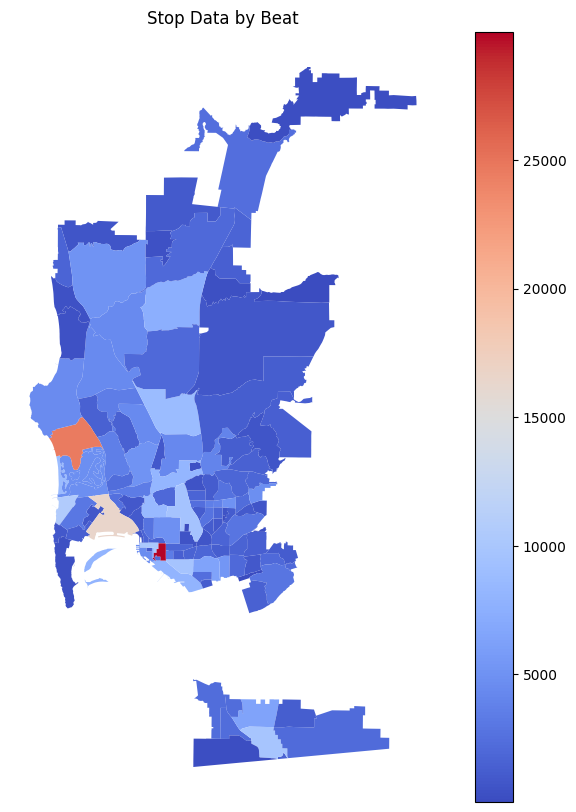

In [20]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_geodata.plot(column='count', cmap='coolwarm', legend=True, ax=ax)
ax.set_title('Stop Data by Beat')
ax.set_axis_off()
plt.show()

## TODO: EDA
Descriptive Statistics:
- Calculate summary statistics (mean, median, mode, standard deviation) for the number of stops and crimes by beat.
- Analyze the distribution of stops and crimes by race and beat.
- Investigate the temporal trends of stops and crimes (daily, weekly, monthly, or yearly).

Visualizations
- Create bar plots or pie charts to show the distribution of stops and crimes by race.
- Generate line plots or bar plots to visualize the trends of stops and crimes over time (by beat or overall).
- Use heatmaps to display the correlation between stops and crimes by beat or by race.
- Plot a time series of stops and crimes to identify any patterns or seasonality.
- Create box plots or violin plots to visualize the distribution of stops and crimes by beat or race.

### References
Papers
- https://www.ojp.gov/ncjrs/virtual-library/abstracts/impact-stops-and-searches-crime-and-community
- https://onlinelibrary.wiley.com/doi/10.1111/1745-9133.12172
- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0157223
- https://onlinelibrary.wiley.com/doi/10.1002/cl2.1302

Articles
- https://www.vera.org/newsroom/study-reveals-stop-and-frisk-significantly-impacts-trust-in-new-york-city-police
- https://gothamist.com/news/new-york-city-police-have-stopped-and-questioned-more-people-this-year-than-last-as-mayor-adams-cracks-down-on-crime


